In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [ ]:
class Integrator:
    
    def __init__(self, x, f):
        
        self.x = x
        self.h = self.x[1] - self.x[0]
        
        self.y = f(self.x)
        
        self.Integral = 0.
        self.Error = 0.
        
        
    def GetStep(self):
        return self.h

class Simpson(Integrator):
    
    def __init__(self,x,f):
        Integrator.__init__(self,x,f)
        
    def GetIntegral(self):
        
        self.Integral = 0.
        
        self.Integral += self.y[0]+self.y[-1]
        
        
        for i in range( len(self.y[1:-1]) ):
            if i%2 == 0:
                self.Integral += 4.*self.y[i+1]
            else:
                self.Integral += 2.*self.y[i+1]
        
        
        return self.Integral*self.h/3.
    
    def GetDerivative(self):
        
        d = f(self.x+2*self.h) - 4*f(self.x+self.h) + 6*f(self.x) - 4*f(self.x-self.h) + f(self.x-2*self.h)
        d = d/self.h**4
        return d
    
    def GetError(self):
            
        d = self.GetDerivative()
            
        max_ = np.max( np.abs(d) )
            
        self.error = ( (self.x[-1]-self.x[0])*self.h**4 * max_  ) /180
            
        return self.error

In [ ]:
def campo_electrico(x,y,z, a=0.5, Q_k=1):

  fx=lambda phi: (x-a*np.cos(phi))/(((x**2)+(y**2)+(z**2)+(a**2)-2*a*x*np.cos(phi)-2*a*y*np.sin(phi))**(3/2))
  fy=lambda phi: (y-a*np.sin(phi))/(((x**2)+(y**2)+(z**2)+(a**2)-2*a*x*np.cos(phi)-2*a*y*np.sin(phi))**(3/2))
  fz=lambda phi: (z)/(((x**2)+(y**2)+(z**2)+(a**2)-2*a*x*np.cos(phi)-2*a*y*np.sin(phi))**(3/2))

  N=1000
  phi=np.linspace(0, 2*np.pi, N)

  Integrator_x=Simpson(phi,fx)
  Integrator_y=Simpson(phi,fy)
  Integrator_z=Simpson(phi,fz)

  Ix=Integrator_x.GetIntegral()
  Iy=Integrator_y.GetIntegral()
  Iz=Integrator_z.GetIntegral()

  Ex=(Q_k/(2*np.pi))*Ix
  Ey=(Q_k/(2*np.pi))*Iy
  Ez=(Q_k/(2*np.pi))*Iz

  E= Ex, Ey, Ez
  return E

In [79]:
print(campo_electrico(0.6,0.6,1))

(0.2115041756424203, 0.21140002290606477, 0.4384396703366504)


In [71]:
N = 6

x=np.linspace(-0.6,0.6,N)
y=np.linspace(-0.6,0.6,N)
z=np.linspace(-0.6,0.6,N)
f=[]
for i in range(N):
  f.append(campo_electrico(x[i],y[i],z[i]))
print(f)


[(-0.44634819360116784, -0.4464107029977392, -0.6408630197981687), (-0.6126584797150555, -0.6128264237178679, -1.8393982359048604), (0.39635441951007166, 0.3957234635187276, -1.1104830657136726), (-0.3938211952219057, -0.3961354319247912, 1.1100803511077058), (0.6132618299664866, 0.6121318710677774, 1.8387077726286056), (0.44643199425230856, 0.4461647054478526, 0.6406180590818161)]


In [93]:
 Ex = np.zeros((N,N,N))
 Ey = np.zeros((N,N,N))
 Ez = np.zeros((N,N,N))

 for i in range(0,N):
   for j in range(0,N):
     for k in range(0,N):
       Ex[i,j,k]=(campo_electrico(x[i],y[j],z[k])[0])
       Ey[i,j,k]=(campo_electrico(x[i],y[j],z[k])[1])
       Ez[i,j,k]=(campo_electrico(x[i],y[j],z[k])[2])

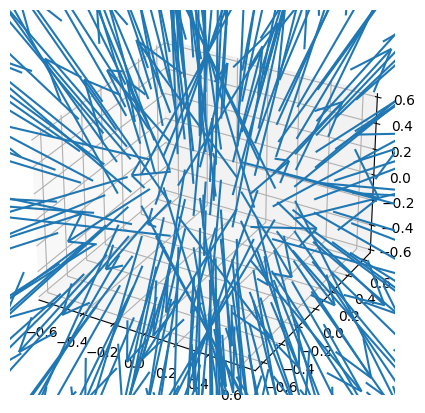

In [92]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111,projection="3d")
x=np.linspace(-0.6,0.6,N)
y=np.linspace(-0.6,0.6,N)
z=np.linspace(-0.6,0.6,N)
for i in range(0,N):
  for j in range(0,N):
    for k in range(0,N):
      x1=x[i]
      y1=y[j]
      z1=z[k]
      ax.quiver(x1,y1,z1,Ex[i,j,k],Ey[i,j,k],Ez[i,j,k])

In [108]:
print(Ex[0])
print(Ey[0])

[[-0.44634819 -0.75776781 -1.24406889 -1.24406889 -0.75776781 -0.44634819]
 [-0.53787863 -1.0160088  -2.39262008 -2.39262008 -1.0160088  -0.53787863]
 [-0.57644694 -1.09919859 -3.4339123  -3.4339123  -1.09919859 -0.57644694]
 [-0.57644707 -1.09919878 -3.43391255 -3.43391255 -1.09919878 -0.57644707]
 [-0.53787897 -1.01600928 -2.39262067 -2.39262067 -1.01600928 -0.53787897]
 [-0.4463486  -0.75776836 -1.24406954 -1.24406954 -0.75776836 -0.4463486 ]]
[[-0.4464107  -0.75784347 -1.24415295 -1.24415295 -0.75784347 -0.4464107 ]
 [-0.32277264 -0.60966185 -1.435636   -1.435636   -0.60966185 -0.32277264]
 [-0.11530639 -0.21986124 -0.68680705 -0.68680705 -0.21986124 -0.11530639]
 [ 0.11530588  0.21986059  0.68680632  0.68680632  0.21986059  0.11530588]
 [ 0.32277227  0.60966142  1.43563552  1.43563552  0.60966142  0.32277227]
 [ 0.44641053  0.75784329  1.24415279  1.24415279  0.75784329  0.44641053]]
